<body>
    <div style="font-family:verdana; background-color:white; color:navy; padding:10px;">
        <h1><center> Programming for Data Science Final Project<br>
            Condo Rental Price </center></h1>
        </div>
</body>

<span style="font-family:'Tw Cen MT'; font-size:30px; color:red"> Introduction 

<span style="font-family:'Tw Cen MT'; font-size:20px; color:blue"> Living in condo units is a new trend in Cambodia compared to other countries in the world due to high price of houses in central Phnom Penh and the problem of traffic jam. This increases the demand in condo market, especially the rental one as young people cannot afford to buy a condominium for themselves. In this study, linear regression models are used to predict the price of a condo unit based on importance features. At the same time, the differences between three linear regression models which are sklearn.linear_model.LinearRegression, sklearn.linear_model.SGDRegressor, and the from-scratch programing model using gradient descent algorithm on squared error cost function are discussed.

<span style="font-family:'Tw Cen MT'; font-size:30px; color:red"> Content
    
> <span style="font-family:'Tw Cen MT'; font-size:20px; color:blue"> - 1. Data collection
    
> <span style="font-family:'Tw Cen MT'; font-size:20px; color:blue">- 2. Data preprocessing 
    
> <span style="font-family:'Tw Cen MT'; font-size:20px; color:blue">- 3. Exploratory data analysis 
    
> <span style="font-family:'Tw Cen MT'; font-size:20px; color:blue">- 4. Modeling

<span style="font-family:'Tw Cen MT'; font-size:30px; color:red"> 1. Data collection

<span style="font-family:'Tw Cen MT'; font-size:20px; color:blue"> Data about a condo unit consists of rental prices in USD/month, area of the unit in squared meter, number of bed rooms, and where it located (Khan). They are collected from 3 different websites which are ‘harbor-property.com’, ‘realestate.com.kh’, and ‘khmer24.com’. To make sure the data is up to date, only data posted within 6 months are collected. There totally 400 samples.

<span style="font-family:'Tw Cen MT'; font-size:30px; color:red"> 2. Data preprocessing

In [7]:
# import necessary packages
import numpy as np
import pandas as pd

In [8]:
# load data
df = pd.read_excel('Condo_rental_raw.xlsx')

C:\Users\Touch Sopheak\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [10]:
# preview some rows of data
df.head()

,No.,Rental price (USD/month),Area (m2),No. bedroom,Khan,Sangkat,Data posted
0,1,1200,130.0,3.0,Mean Chey,Chakto Mukh,2022-03-02
1,2,1100,135.0,3.0,Chamkar Mon,Tonle Basak,2022-10-26
2,3,900,63.0,2.0,Chamkar Mon,Tonle Basak,2023-01-07
3,4,800,107.0,2.0,Tuol Kouk,Boeng Kak Ti Muoy,2023-02-03
4,5,870,NaN,2.0,Chamkar Mon,Boeng Keng Kang Ti Bei,2023-02-03


In [9]:
# print columns of data frame
df.columns

Index(['No.', 'Rental price (USD/month)', 'Area (m2)', 'No. bedroom', 'Khan',
       'Sangkat', 'Data posted'],
      dtype='object')

In [11]:
# for this study, we are interested in prediction rental price with three features, Area(m2), No. bedroom and Khan
df = df[['Rental price (USD/month)', 'Area (m2)', 'No. bedroom', 'Khan']]
df.head()

,Rental price (USD/month),Area (m2),No. bedroom,Khan
0,1200,130.0,3.0,Mean Chey
1,1100,135.0,3.0,Chamkar Mon
2,900,63.0,2.0,Chamkar Mon
3,800,107.0,2.0,Tuol Kouk
4,870,NaN,2.0,Chamkar Mon


In [12]:
# check size of data
df.shape

(400, 4)

In [13]:
# check number of null values in each collumn
df.isnull().sum()

Rental price (USD/month)     0
Area (m2)                   23
No. bedroom                  3
Khan                         1
dtype: int64

In [14]:
# as null values represent less than 6% of the data, we decide to remove all rows containing them
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,Rental price (USD/month),Area (m2),No. bedroom,Khan
0,1200,130.0,3.0,Mean Chey
1,1100,135.0,3.0,Chamkar Mon
2,900,63.0,2.0,Chamkar Mon
3,800,107.0,2.0,Tuol Kouk
4,2500,91.0,2.0,Chamkar Mon


In [15]:
# check null values again
df.isnull().sum()

Rental price (USD/month)    0
Area (m2)                   0
No. bedroom                 0
Khan                        0
dtype: int64

In [16]:
# summary statistic (cateogrical values)
df.describe(include = 'object')

,Khan
count,374
unique,8
top,Chamkar Mon
freq,232


In [17]:
# check unique values of Khan
sorted(df.Khan.unique())

['Chamkar Mon',
 'Chbar Ampov',
 'Doun Penh',
 'Mean Chey',
 'Prampir Meakkakra',
 'Russey Keo',
 'Saensokh',
 'Tuol Kouk']

In [18]:
# one hot encode for each variable of Khan
for khan in sorted(df.Khan.unique()):
    df[khan] = (df['Khan']==khan).astype(int)

df.head()

,Rental price (USD/month),Area (m2),No. bedroom,Khan,Chamkar Mon,Chbar Ampov,Doun Penh,Mean Chey,Prampir Meakkakra,Russey Keo,Saensokh,Tuol Kouk
0,1200,130.0,3.0,Mean Chey,0,0,0,1,0,0,0,0
1,1100,135.0,3.0,Chamkar Mon,1,0,0,0,0,0,0,0
2,900,63.0,2.0,Chamkar Mon,1,0,0,0,0,0,0,0
3,800,107.0,2.0,Tuol Kouk,0,0,0,0,0,0,0,1
4,2500,91.0,2.0,Chamkar Mon,1,0,0,0,0,0,0,0


In [19]:
# remove 'Khan' column
df.drop(columns='Khan', inplace=True)
df.head()

,Rental price (USD/month),Area (m2),No. bedroom,Chamkar Mon,Chbar Ampov,Doun Penh,Mean Chey,Prampir Meakkakra,Russey Keo,Saensokh,Tuol Kouk
0,1200,130.0,3.0,0,0,0,1,0,0,0,0
1,1100,135.0,3.0,1,0,0,0,0,0,0,0
2,900,63.0,2.0,1,0,0,0,0,0,0,0
3,800,107.0,2.0,0,0,0,0,0,0,0,1
4,2500,91.0,2.0,1,0,0,0,0,0,0,0


In [20]:
# feature scalling on 'Area (m2)'
df['Area (m2)'] = (df['Area (m2)'] - np.mean(df['Area (m2)']))/(np.max(df['Area (m2)'])-np.min(df['Area (m2)']))
df.head()

,Rental price (USD/month),Area (m2),No. bedroom,Chamkar Mon,Chbar Ampov,Doun Penh,Mean Chey,Prampir Meakkakra,Russey Keo,Saensokh,Tuol Kouk
0,1200,0.260214,3.0,0,0,0,1,0,0,0,0
1,1100,0.282436,3.0,1,0,0,0,0,0,0,0
2,900,-0.037564,2.0,1,0,0,0,0,0,0,0
3,800,0.157992,2.0,0,0,0,0,0,0,0,1
4,2500,0.086881,2.0,1,0,0,0,0,0,0,0


[0.78825895 0.086895   0.02051778 0.00679805 0.01925248 0.01461244
 0.01717647 0.0089705  0.01719176 0.02032659]


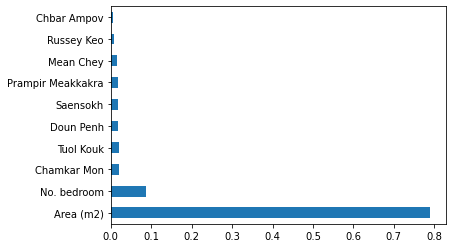

In [22]:
# feature importance 
X = df.iloc[:,1:]  #independent columns
y = df.iloc[:,0]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [25]:
# feature selection, choose the most two important feautres which are Area(m2) and No. bedroom
df = pd.read_excel('Condo_rental_raw.xlsx')
df = df[['Rental price (USD/month)', 'Area (m2)', 'No. bedroom']]
df.head()

C:\Users\Touch Sopheak\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Rental price (USD/month),Area (m2),No. bedroom
0,1200,130.0,3.0
1,1100,135.0,3.0
2,900,63.0,2.0
3,800,107.0,2.0
4,870,NaN,2.0


<span style="font-family:'Tw Cen MT'; font-size:30px; color:red"> 3. Exploratory data analysis

In [26]:
# check type of data
df.dtypes

Rental price (USD/month)      int64
Area (m2)                   float64
No. bedroom                 float64
dtype: object

In [29]:
# check number of null values in each collumn
df.isnull().sum()

Rental price (USD/month)     0
Area (m2)                   23
No. bedroom                  3
dtype: int64

In [30]:
# as null values represent less than 6% of the data, we decide to remove all rows containing them
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,Rental price (USD/month),Area (m2),No. bedroom
0,1200,130.0,3.0
1,1100,135.0,3.0
2,900,63.0,2.0
3,800,107.0,2.0
4,2500,91.0,2.0


In [31]:
# check null values again
df.isnull().sum()

Rental price (USD/month)    0
Area (m2)                   0
No. bedroom                 0
dtype: int64

In [32]:
# Descriptive statistic of data
df.describe()

,Rental price (USD/month),Area (m2),No. bedroom
count,375.000000,375.000000,375.000000
mean,591.720000,71.501333,1.450667
std,509.870529,30.648418,0.651689
min,100.000000,25.000000,1.000000
25%,310.000000,50.000000,1.000000
50%,450.000000,66.000000,1.000000
75%,650.000000,85.000000,2.000000
max,3800.000000,250.000000,4.000000


In [33]:
# check infomation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rental price (USD/month)  375 non-null    int64  
 1   Area (m2)                 375 non-null    float64
 2   No. bedroom               375 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.9 KB


<AxesSubplot:xlabel='Rental price (USD/month)', ylabel='Count'>

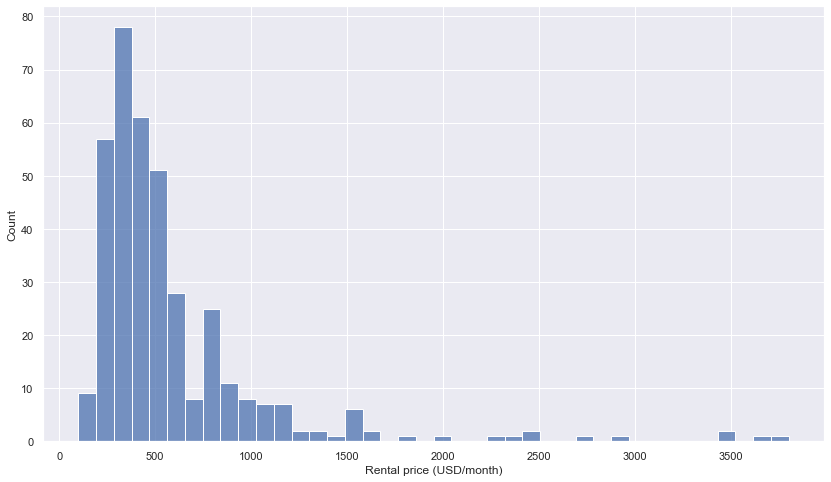

In [34]:
# Visualization of distribution of rental price
import seaborn as sns

sns.set(rc={'figure.figsize': (14, 8)})
sns.histplot(df['Rental price (USD/month)'])

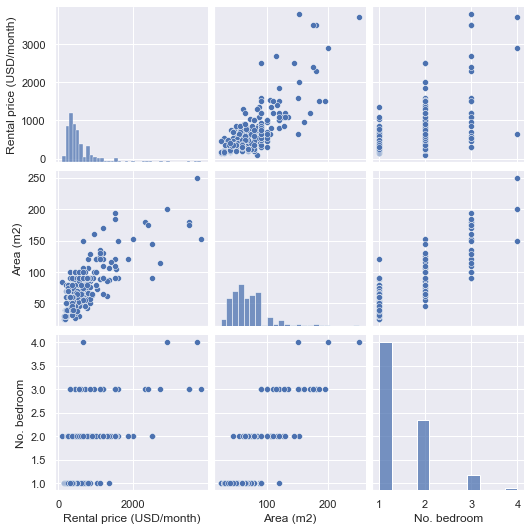

In [35]:
# Create pairplot to see relation between two features
sns.pairplot(df)

<AxesSubplot:>

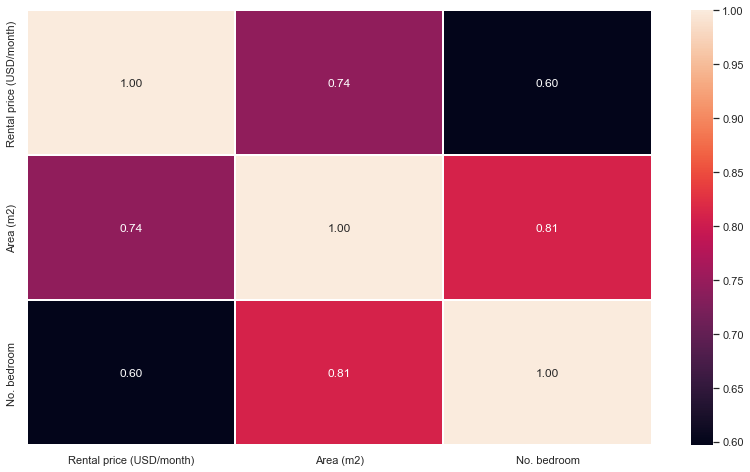

In [36]:
# Create heat map
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

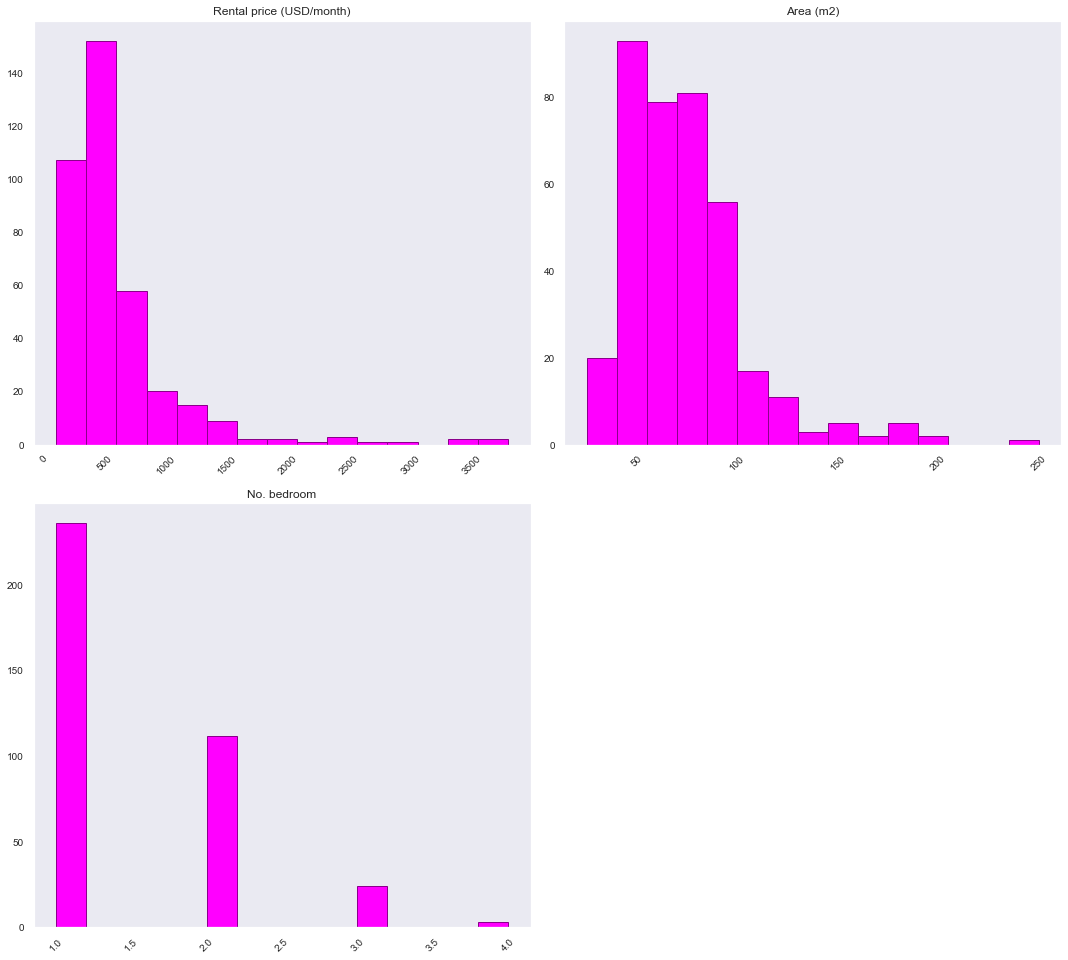

In [37]:
import matplotlib.pyplot as plt

fig = df.hist(bins=15, color='fuchsia', edgecolor='darkmagenta', linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

<AxesSubplot:xlabel='Rental price (USD/month)'>

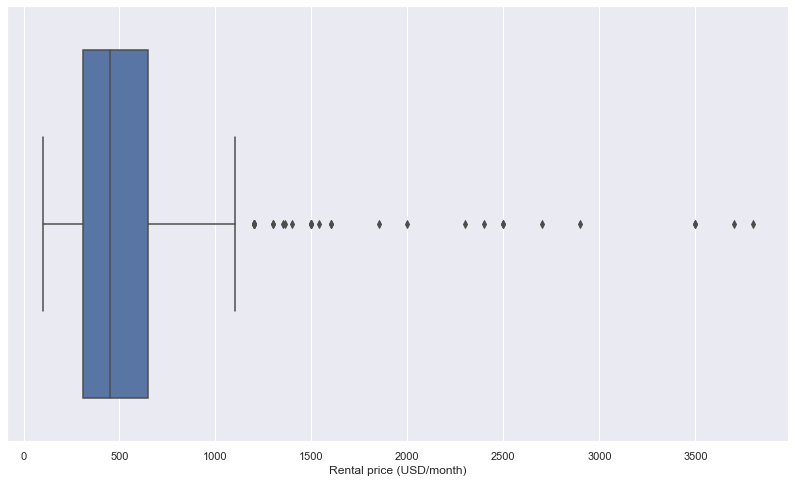

In [38]:
# Create boxplot of rental price data
sns.boxplot(x='Rental price (USD/month)', data = df)

<AxesSubplot:xlabel='Area (m2)'>

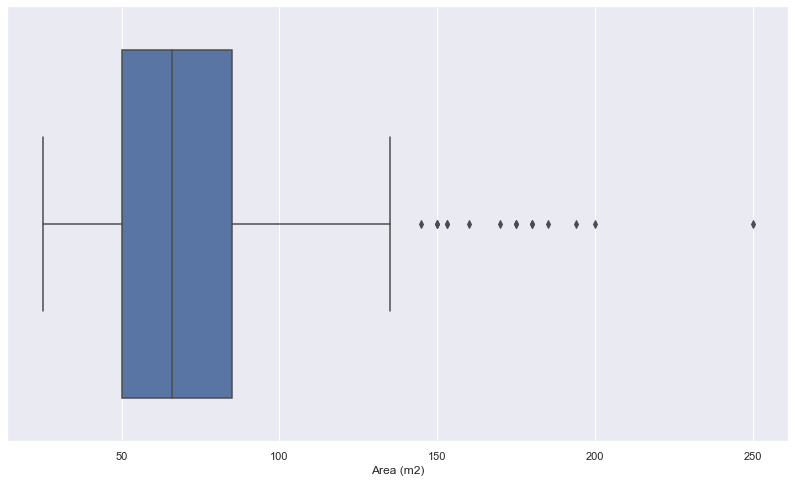

In [39]:
# Create boxplot of area data
sns.boxplot(x='Area (m2)', data = df)

<AxesSubplot:xlabel='No. bedroom'>

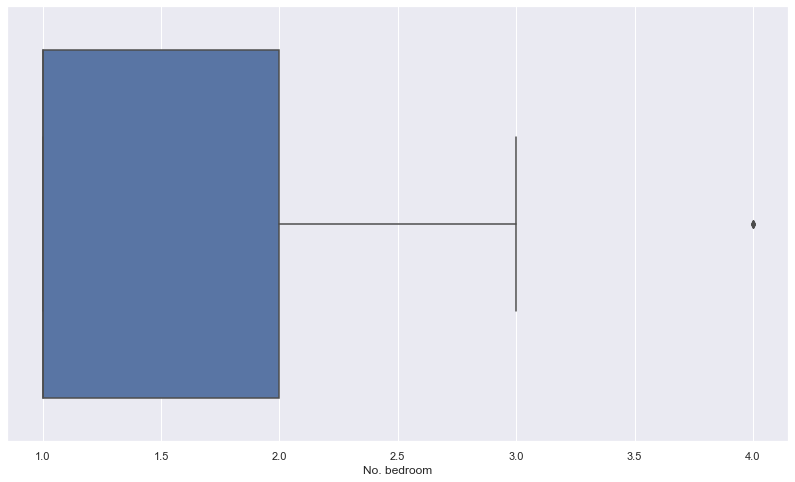

In [40]:
# Create boxplot of number of bedrooms data
sns.boxplot(x='No. bedroom', data = df)

<AxesSubplot:xlabel='No. bedroom', ylabel='Rental price (USD/month)'>

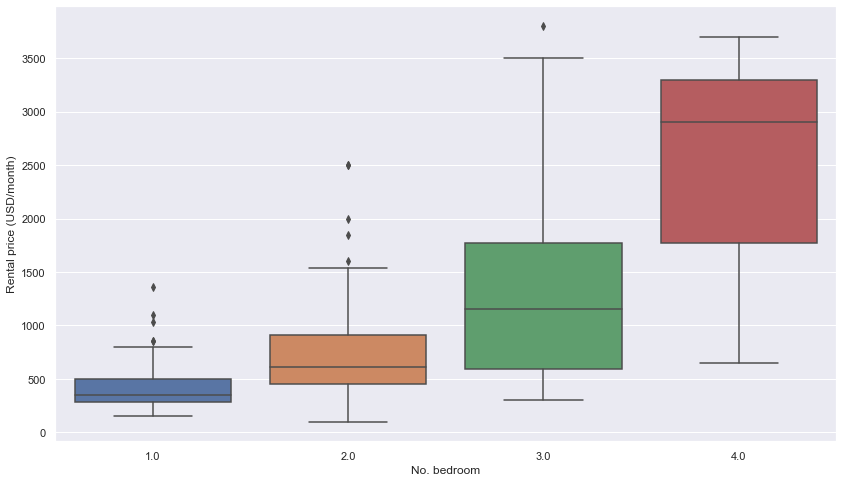

In [41]:
# Create boxplot of rentral price per types of bedrooms
sns.boxplot(x='No. bedroom', y='Rental price (USD/month)', data = df)

In [44]:
df.groupby('No. bedroom')['Rental price (USD/month)'].mean()

No. bedroom
1.0     410.360169
2.0     742.857143
3.0    1441.666667
4.0    2416.666667
Name: Rental price (USD/month), dtype: float64

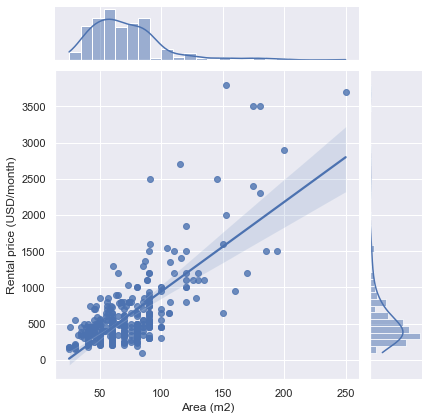

In [42]:
# create joinplot between two variables
sns.jointplot(x='Area (m2)',y='Rental price (USD/month)',data=df, kind='reg')

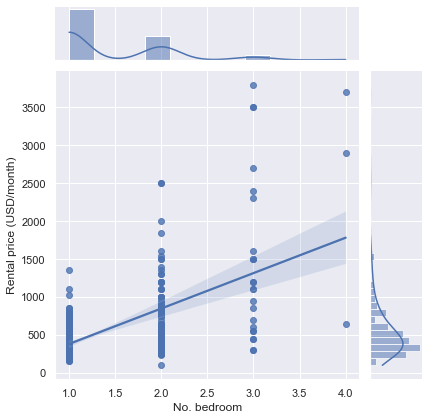

In [43]:
# create joinplot between two variables
sns.jointplot(x='No. bedroom',y='Rental price (USD/month)',data=df, kind='reg')

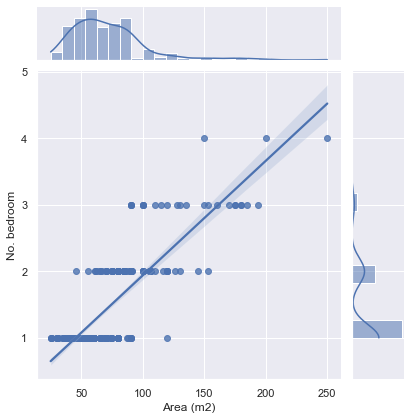

In [45]:
# create joinplot between two variables
sns.jointplot(x='Area (m2)',y='No. bedroom',data=df, kind='reg')

<span style="font-family:'Tw Cen MT'; font-size:30px; color:red"> 4. Modeling

In [48]:
# view some rows of data 
df.head()

,Rental price (USD/month),Area (m2),No. bedroom
0,1200,130.0,3.0
1,1100,135.0,3.0
2,900,63.0,2.0
3,800,107.0,2.0
4,2500,91.0,2.0


In [49]:
# convert dataframe to numpy array
data = df.to_numpy()
data[:5]

array([[1.20e+03, 1.30e+02, 3.00e+00],
       [1.10e+03, 1.35e+02, 3.00e+00],
       [9.00e+02, 6.30e+01, 2.00e+00],
       [8.00e+02, 1.07e+02, 2.00e+00],
       [2.50e+03, 9.10e+01, 2.00e+00]])

In [50]:
# Seperate variables X and target y
X = data[:, 1:]
y = data[:, 0]
print(X.shape)
print(y.shape)

(375, 2)
(375,)


In [53]:
# feature scaling 
def scale(x):
  return (x-x.mean(axis=0))/(x.max(axis=0)-x.min(axis=0))

X = scale(X)
X[:5]

array([[ 0.25999407,  0.51644444],
       [ 0.2822163 ,  0.51644444],
       [-0.0377837 ,  0.18311111],
       [ 0.15777185,  0.18311111],
       [ 0.08666074,  0.18311111]])

In [54]:
# split data set into training set (70%), test set (30%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=2023, 
                                                    test_size=0.3, 
                                                    shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(262, 2)
(262,)
(113, 2)
(113,)


In [55]:
# linear regression model using scikit-learn
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train,y_train)
score1 = model1.score(X_test,y_test)
print(score1)

0.5610590684162924


In [62]:
from sklearn.linear_model import SGDRegressor

model2 = SGDRegressor(max_iter=3000)
model2.fit(X_train,y_train)
score2 = model2.score(X_test,y_test)
print(model2.n_iter_) # number of iterations before reaching the stopping criterion 
print(score2)

2839
0.5411266681199519


In [67]:
# Build linear regression model from scratch

# hypothesis function
def hyp(X, theta, b):
    '''
    Hypothesis function
    X : variables, numpy array (m,n)
    thetha : linear coefficients, numpy array (n,1)
    b : intercetion coefficient, scalar
    return z : prediction value, numpy array (m,1)
    '''
    z = np.matmul(X, theta) + b
    return z

# cost function
def cost_func(X, theta, b, y):
    '''
    y: target values, numpy array (m,)
    return cost: scalar value
    '''
    cost = (hyp(X, theta, b) - y.reshape(-1,1))**2
    cost = cost.mean()
    return cost

# gradient function
def grad_th(X, theta, b, y):
    '''
    return a list of gradient of linear coefficients
    '''
    grad_theta = []
    for i in range(len(theta)):
        grad_theta_i = (((hyp(X, theta, b) - y.reshape(-1,1))*X[:, i]).mean())*2
        grad_theta.append(grad_theta_i)
    return grad_theta

def grad_b(X, theta, b, y):
    '''
    return the gradient of interception coefficient
    '''
    grad_b = ((hyp(X, theta, b) - y.reshape(-1,1)).mean())*2
    return grad_b

# Training model with training data
theta = np.random.rand(X_train.shape[1], 1) # randomize initial values of theta
b = np.random.rand(1,1) # randomize initial value of b
alpha = 0.1

for i in range(100):
   cost = cost_func(X_train, theta, b, y_train)
   g_theta = grad_th(X_train, theta, b, y_train)
   g_b = grad_b(X_train, theta, b, y_train)
   theta += -alpha*(np.array(g_theta).reshape(-1,1))
   b += -alpha*g_b
   print("%d => cost: %f" % (i, cost))

0 => cost: 545890.648258
1 => cost: 426097.217163
2 => cost: 349417.656052
3 => cost: 300333.165473
4 => cost: 268911.332389
5 => cost: 248795.086693
6 => cost: 235915.629688
7 => cost: 227668.702688
8 => cost: 222387.392707
9 => cost: 219004.722024
10 => cost: 216837.699957
11 => cost: 215449.111095
12 => cost: 214559.055572
13 => cost: 213988.331285
14 => cost: 213622.195570
15 => cost: 213387.170227
16 => cost: 213236.194742
17 => cost: 213139.122713
18 => cost: 213076.638245
19 => cost: 213036.361366
20 => cost: 213010.354628
21 => cost: 212993.526637
22 => cost: 212982.609748
23 => cost: 212975.505338
24 => cost: 212970.864423
25 => cost: 212967.818954
26 => cost: 212965.809623
27 => cost: 212964.475462
28 => cost: 212963.583047
29 => cost: 212962.981058
30 => cost: 212962.571109
31 => cost: 212962.289001
32 => cost: 212962.092659
33 => cost: 212961.954365
34 => cost: 212961.855750
35 => cost: 212961.784549
36 => cost: 212961.732512
37 => cost: 212961.694033
38 => cost: 212961.665

In [66]:
print(theta, b)

[[1.55357802]
 [3.6704434 ]] [[577.32739942]]


In [65]:
# Calculate R2 (Score) of the above model using test data

score3 = 1 - ((((hyp(X_test, theta, b)-y_test.reshape(-1,1))**2).sum())/(((y_test-np.mean(y_test))**2).sum()))
print(score3)

-0.004096938374856807


In [69]:
# Compare the three models

dict = {'Model': ['LinearRegression', 'SGDRegressor', 'From-Scrath Model'],
        'Score': [score1, score2, score3] }
performance = pd.DataFrame(dict)
performance

,Model,Score
0,LinearRegression,0.561059
1,SGDRegressor,0.541127
2,From-Scrath Model,-0.004097


<span style="font-family:'Tw Cen MT'; font-size:30px; color:red"> Conclusion 

<span style="font-family:'Tw Cen MT'; font-size:20px; color:blue"> LinearRegression and SGD give similar results, but the model from scratch give very low results. 